# DATA ANALYSIS
In this notebook we gonna explore the available data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('data/train.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
df[['target']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,7613.0,0.42966,0.49506,0.0,0.0,0.0,1.0,1.0


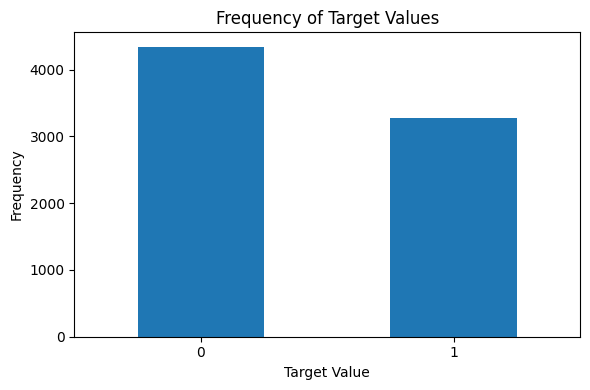

In [5]:
# Count the frequency of each target value
target_counts = df['target'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 4))
target_counts.plot(kind='bar')
plt.title('Frequency of Target Values')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [6]:
df['keyword'].nunique()

221

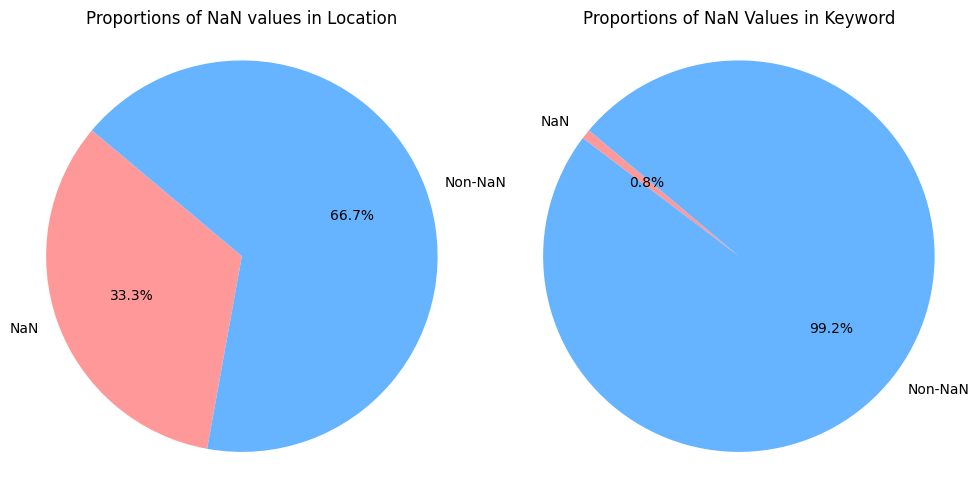

In [7]:
# Count NaN values in 'location' and 'keyword' columns
nan_location_count = df['location'].isna().sum()
nan_keyword_count = df['keyword'].isna().sum()

# Count non-NaN values in 'location' and 'keyword' columns
non_nan_location_count = df['location'].notna().sum()
non_nan_keyword_count = df['keyword'].notna().sum()

# Create labels for the pie charts
labels_location = ['NaN', 'Non-NaN']
labels_keyword = ['NaN', 'Non-NaN']

# Create data for the pie charts
sizes_location = [nan_location_count, non_nan_location_count]
sizes_keyword = [nan_keyword_count, non_nan_keyword_count]

# Create colors for different sections of the pie charts
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Plot the pie chart for 'location' column
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes_location, labels=labels_location, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportions of NaN values in Location')

# Plot the pie chart for 'keyword' column
plt.subplot(1, 2, 2)
plt.pie(sizes_keyword, labels=labels_keyword, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportions of NaN Values in Keyword')

# Adjust layout
plt.tight_layout()

# Show the pie charts
plt.show()
         

In [8]:
# Count the occurrences of each location
print(df[['location']].value_counts().to_dict())

{('USA',): 104, ('New York',): 71, ('United States',): 50, ('London',): 45, ('Canada',): 29, ('Nigeria',): 28, ('UK',): 27, ('Los Angeles, CA',): 26, ('India',): 24, ('Mumbai',): 22, ('Washington, DC',): 21, ('Kenya',): 20, ('Worldwide',): 19, ('Chicago, IL',): 18, ('Australia',): 18, ('California',): 17, ('Everywhere',): 15, ('New York, NY',): 15, ('California, USA',): 15, ('San Francisco',): 14, ('United Kingdom',): 14, ('Florida',): 14, ('Los Angeles',): 13, ('Washington, D.C.',): 13, ('Indonesia',): 13, ('NYC',): 12, ('Toronto',): 12, ('Ireland',): 12, ('Seattle',): 11, ('Chicago',): 11, ('Earth',): 11, ('San Francisco, CA',): 11, ('London, England',): 10, ('London, UK',): 10, ('ss',): 10, ('Texas',): 10, ('Sacramento, CA',): 10, ('New York City',): 10, ('Atlanta, GA',): 10, ('World',): 9, ('Nashville, TN',): 9, ('304',): 9, ('San Diego, CA',): 9, ('Manchester',): 9, ('US',): 9, ('Denver, Colorado',): 9, ('Dallas, TX',): 9, ('Scotland',): 8, ('Houston, TX',): 8, ('South Africa',): 

In [9]:
# Group by 'location' and calculate the sum of target values for each location
location_target_counts = df.groupby('location')['target'].sum()
print(location_target_counts.to_dict())
print(len(location_target_counts))

{'  ': 1, '  Glasgow ': 0, '  Melbourne, Australia': 0, '  News': 1, '  å_ ': 0, " 45å¡ 5'12.53N   14å¡ 7'24.93E": 0, ' 616 \x89Û¢ Kentwood , MI ': 1, ' ? ??????? ? ( ?? å¡ ? ? ? å¡)': 1, ' ?currently writing a book?': 0, ' Alberta': 1, ' Alex/Mika/Leo|18|he/she/they': 0, ' BC, US, Asia or Europe.': 0, ' Baku & Erzurum ': 1, ' Blood Indian Reserve': 0, ' Bouvet Island': 1, ' Eugene, Oregon': 0, ' Indiana': 0, ' Jariana Town': 0, ' Little Rock, AR': 0, ' Miami Beach': 0, ' Nevada Carson City,Freeman St': 1, ' Neverland ': 0, ' New Delhi ': 0, ' New England': 1, ' Nxgerxa': 0, ' Quantico Marine Base, VA.': 0, ' Queensland, Australia': 1, ' Road to the Billionaires Club': 1, ' Somewhere.': 0, ' The World': 1, ' Tropical SE FLorida': 0, ' snapchat // fvck_casper ': 0, ' |IG: imaginedragoner': 0, '#1 Vacation Destination,HAWAII': 1, '#937??#734': 0, '#????? Libya#': 1, '#BlackLivesMatter': 1, '#BossNation!': 0, '#Bummerville otw': 1, '#EngleWood CHICAGO ': 0, '#FLIGHTCITY UK  ': 0, '#Foreve

In [10]:
print(df[df['target'] == 1]['location'].unique())
print(len(df[df['target'] == 1]['location'].unique()))

[nan 'Birmingham' 'AFRICA' ... "Xi'an, China" 'Santa Cruz, CA'
 'Manhattan, NY']
1514


In [11]:
# Count the occurrences of each keyword
print(df[['keyword']].value_counts().to_dict())

{('fatalities',): 45, ('deluge',): 42, ('armageddon',): 42, ('sinking',): 41, ('damage',): 41, ('harm',): 41, ('body%20bags',): 41, ('outbreak',): 40, ('evacuate',): 40, ('fear',): 40, ('collided',): 40, ('siren',): 40, ('twister',): 40, ('windstorm',): 40, ('sinkhole',): 39, ('sunk',): 39, ('hellfire',): 39, ('weapon',): 39, ('weapons',): 39, ('famine',): 39, ('explosion',): 39, ('whirlwind',): 39, ('earthquake',): 39, ('derailment',): 39, ('wreckage',): 39, ('collision',): 39, ('flames',): 39, ('wrecked',): 39, ('oil%20spill',): 38, ('flooding',): 38, ('deaths',): 38, ('derailed',): 38, ('thunder',): 38, ('ambulance',): 38, ('drowned',): 38, ('explode',): 38, ('blaze',): 38, ('fatal',): 38, ('typhoon',): 38, ('fire',): 38, ('upheaval',): 38, ('hurricane',): 38, ('injury',): 38, ('bombed',): 38, ('panic',): 37, ('pandemonium',): 37, ('debris',): 37, ('blizzard',): 37, ('destroy',): 37, ('sandstorm',): 37, ('mudslide',): 37, ('ruin',): 37, ('quarantined',): 37, ('fatality',): 37, ('bio

In [12]:
# Group by 'keyword' and calculate the sum of target values for each keyword
keyword_target_counts = df.groupby('keyword')['target'].sum()
print(keyword_target_counts.to_dict())
print(len(keyword_target_counts))

{'ablaze': 13, 'accident': 24, 'aftershock': 0, 'airplane%20accident': 30, 'ambulance': 20, 'annihilated': 11, 'annihilation': 10, 'apocalypse': 9, 'armageddon': 5, 'army': 5, 'arson': 22, 'arsonist': 8, 'attack': 25, 'attacked': 21, 'avalanche': 4, 'battle': 5, 'bioterror': 22, 'bioterrorism': 21, 'blaze': 5, 'blazing': 1, 'bleeding': 5, 'blew%20up': 2, 'blight': 2, 'blizzard': 4, 'blood': 5, 'bloody': 3, 'blown%20up': 5, 'body%20bag': 1, 'body%20bagging': 5, 'body%20bags': 1, 'bomb': 15, 'bombed': 19, 'bombing': 27, 'bridge%20collapse': 29, 'buildings%20burning': 24, 'buildings%20on%20fire': 28, 'burned': 7, 'burning': 10, 'burning%20buildings': 21, 'bush%20fires': 18, 'casualties': 28, 'casualty': 15, 'catastrophe': 7, 'catastrophic': 20, 'chemical%20emergency': 15, 'cliff%20fall': 8, 'collapse': 15, 'collapsed': 13, 'collide': 3, 'collided': 23, 'collision': 29, 'crash': 12, 'crashed': 21, 'crush': 4, 'crushed': 4, 'curfew': 5, 'cyclone': 19, 'damage': 19, 'danger': 8, 'dead': 7, '

In [13]:
print(df[df['target'] == 1]['keyword'].unique())
print(len(df[df['target'] == 1]['keyword'].unique()))

[nan 'ablaze' 'accident' 'airplane%20accident' 'ambulance' 'annihilated'
 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson' 'arsonist'
 'attack' 'attacked' 'avalanche' 'battle' 'bioterror' 'bioterrorism'
 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight' 'blizzard' 'blood'
 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging' 'body%20bags' 'bomb'
 'bombed' 'bombing' 'bridge%20collapse' 'buildings%20burning'
 'buildings%20on%20fire' 'burned' 'burning' 'burning%20buildings'
 'bush%20fires' 'casualties' 'casualty' 'catastrophe' 'catastrophic'
 'chemical%20emergency' 'cliff%20fall' 'collapse' 'collapsed' 'collide'
 'collided' 'collision' 'crash' 'crashed' 'crush' 'crushed' 'curfew'
 'cyclone' 'damage' 'danger' 'dead' 'death' 'deaths' 'debris' 'deluge'
 'deluged' 'demolish' 'demolished' 'demolition' 'derail' 'derailed'
 'derailment' 'desolate' 'desolation' 'destroy' 'destroyed' 'destruction'
 'detonate' 'detonation' 'devastated' 'devastation' 'disaster' 'displaced'
 'drought' 'drown' '

In [14]:
# Calculate the length of each text and create a new column 'text_length'
df['text_length'] = df['text'].apply(len)

# Calculate the average and maximum text length
average_text_length = df['text_length'].mean()
max_text_length = df['text_length'].max()

print("Average text length:", average_text_length)
print("Maximum text length:", max_text_length)

Average text length: 101.03743596479706
Maximum text length: 157
